In [1]:
#Tree task - immediate rewards vs possible reward (or punishment with some time cost 
#Actor decay (low), actor update 0.2, critic update 0.7 and beta 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import tqdm

In [3]:
beta = 1
n_trials = 1000
LR = 0.2

In [4]:
#Immediate choice values - not learnt state values:
c1 = np.array([1,-1,2])
c2 = np.array([8,-8])
c3 = np.array([0,4])


In [5]:
#Flat policy
np.random.seed(2) #Reproducibility
runs = 50
values_all = np.zeros([runs,n_trials,3])
for run in range(runs):
    values = np.zeros([n_trials,3]) #3 values for 3 states 
    for n in range(n_trials):
        a1 = np.random.choice(c1)
        if a1 == 1 or a1==2:
            values[n,0] = values[n-1,0]
            delta = a1 - values[n-1,0]
            values[n,0] = values[n-1,0] + LR * delta 
            values[n,1:3] = values[n-1,1:3]
        else:
            idx,rand_choice = random.choice(list(enumerate(np.array([c2,c3]))))
            a2 = random.choice(rand_choice) 
            values[n,0] = values[n-1,0]
            delta = a1+a2 - values[n-1,0] + values[n-1,idx+1]
            values[n,0] = values[n-1,0] + LR * delta
            if idx == 0:
                delta2 = a2 - values[n-1,1]
                values[n,1] = values[n-1,1] + LR * delta2
                values[n,2] = values[n-1,2]
            elif idx == 1:
                delta3 = a2 - values[n-1,2]
                values[n,2] = values[n-1,2] + LR * delta3       
                values[n,1] = values[n-1,1]
        values_all[run,n,0] = values[n,0]
        values_all[run,n,1] = values[n,1]
        values_all[run,n,2] = values[n,2]

In [6]:
avg_val0 = np.mean(values_all[:,:,0],0)
avg_val1 = np.mean(values_all[:,:,1],0)
avg_val2 = np.mean(values_all[:,:,2],0)

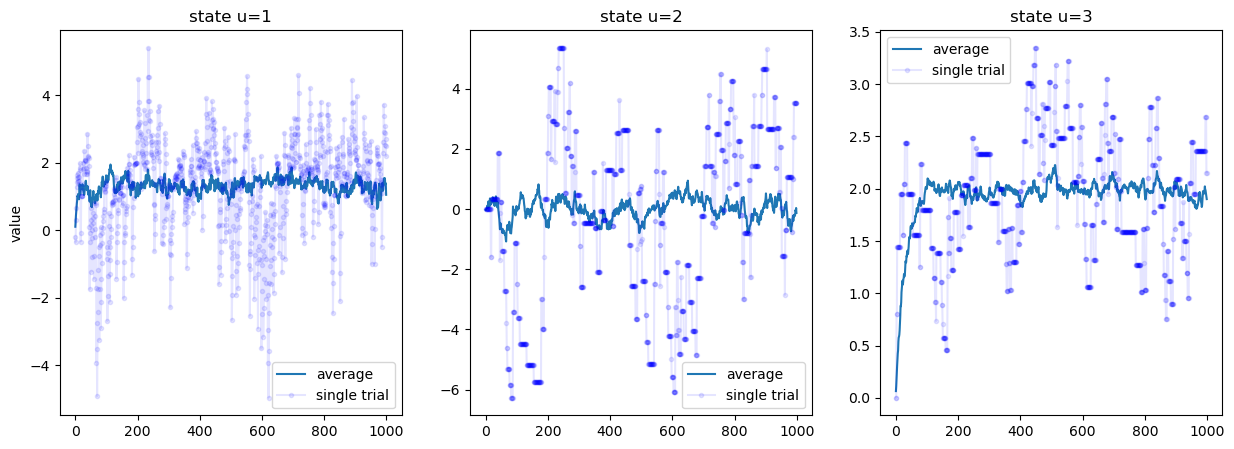

In [58]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5)) 


ax[0].plot(avg_val0,label="average")
ax[0].plot(values_all[10,:,0],marker='.',alpha=0.1,c="blue",label="single trial")
ax[0].set_ylabel("value")
ax[0].legend()
ax[0].set_title("state u=1")

ax[1].plot(avg_val1,label="average")
ax[1].plot(values_all[10,:,1],marker='.',alpha=0.1,c="blue",label="single trial")
ax[1].set_title("state u=2")
ax[1].legend()

ax[2].plot(avg_val2,label="average")
ax[2].plot(values_all[10,:,2],marker='.',alpha=0.1,c="blue",label="single trial")
ax[2].set_title("state u=3")
ax[2].legend()


In [14]:
np.random.seed(2)  # Reproducibility
runs=1000
n_trials = 1000
LR_ac = 0.075

#Initialize m
m1 = np.zeros([n_trials,3]) #L,C,R 
m2 = np.zeros([n_trials,2]) #L,R
m3 = np.zeros([n_trials,2]) #L,R

#Initialize probabilites:
p1 = np.zeros([n_trials,3])
p2 = np.zeros([n_trials,2])
p3 = np.zeros([n_trials,2])
for i in range(len(p1[0])):
    p1[0,i] = np.exp(beta*m1[0,i])/np.sum(np.exp(m1[0]))
for i in range(len(p2[0])):
    p2[0,i] = np.exp(beta*m2[0,i])/np.sum(np.exp(m2[0]))
    p3[0,i] = np.exp(beta*m3[0,i])/np.sum(np.exp(m3[0]))

#Immediate choice values - not learnt state values:
c1 = np.array([1,-1,2])
c2 = np.array([8,-8])
c3 = np.array([0,4])

#For saving
values_all_ac = np.zeros([runs, n_trials, 3])
p1_all_ac = np.zeros([runs, n_trials, 3])
p2_all_ac = np.zeros([runs, n_trials, 2])
p3_all_ac = np.zeros([runs, n_trials, 2])

for r in tqdm.tqdm(range(runs)):
    values_ac = np.zeros([n_trials, 3])
    m1 = np.zeros([n_trials,3]) #L,C,R 
    m2 = np.zeros([n_trials,2]) #L,R
    m3 = np.zeros([n_trials,2]) #L,R

    #Resetting probabilities for each run
    p1 = np.zeros([n_trials,3])
    p2 = np.zeros([n_trials,2])
    p3 = np.zeros([n_trials,2])
    for i in range(len(p1[0])):
        p1[0,i] = np.exp(beta*m1[0,i])/np.sum(np.exp(m1[0]))
    for i in range(len(p2[0])):
        p2[0,i] = np.exp(beta*m2[0,i])/np.sum(np.exp(m2[0]))
        p3[0,i] = np.exp(beta*m3[0,i])/np.sum(np.exp(m3[0]))

    for n in range(n_trials):
        for i in range(len(p1[0])):
            p1[n, i] = np.exp(beta * m1[n-1, i]) / np.sum(np.exp(m1[n-1])) # Update the action probabilities for the next trial
        a1 = np.random.choice(c1, p=p1[n, :])
        a1_idx = np.where(a1 == c1)[0][0]

        if a1 == 1 or a1 == 2:
            delta = a1 - values_ac[n-1, 0]
            values_ac[n, 0] = values_ac[n-1, 0] + LR * delta
            values_ac[n, 1:3] = values_ac[n-1, 1:3] #Update values_ac as above
            #Update m and therefore p
            m1[n] = m1[n-1]
            m1[n, a1_idx] = m1[n - 1, a1_idx] + LR_ac*delta #Decay not implemented, just the delta
            p2[n], p3[n] = p2[n-1], p3[n-1]
            m2[n], m3[n] = m2[n-1], m3[n-1]

        else:  # i.e. when a1 == -1
            # Get action probability p
            for i in range(len(p2[0])):
                p2[n, i] = np.exp(beta * m2[n-1, i]) / np.sum(np.exp(m2[n-1]))
                p3[n, i] = np.exp(beta * m3[n-1, i]) / np.sum(np.exp(m3[n-1]))

            idx, rand_choice = random.choice(list(enumerate(np.array([c2, c3]))))
            if idx == 0:
                a2 = np.random.choice(rand_choice, p=p2[n, :])
            elif idx == 1:
                a2 = np.random.choice(rand_choice, p=p3[n, :])
            delta = a1 - values_ac[n-1, 0] + values_ac[n-1, idx+1]
            values_ac[n, 0] = values_ac[n-1, 0] + LR * delta

            #Update m 
            m1[n] = m1[n-1]
            m1[n, a1_idx] = m1[n - 1, a1_idx] + LR_ac*delta  # Decay not implemented, just the delta

            if idx == 0:
                delta2 = a2 - values_ac[n-1, 1]
                values_ac[n, 1] = values_ac[n-1, 1] + LR * delta2
                values_ac[n, 2] = values_ac[n-1, 2]
                a2_idx = np.where(a2 == c2)[0][0]
                # Update m
                m2[n] = m2[n-1]
                m2[n, a2_idx] = m2[n-1, a2_idx] + LR_ac*delta2
                m3[n] = m3[n-1]

            elif idx == 1:
                delta3 = a2 - values_ac[n-1, 2]
                values_ac[n, 2] = values_ac[n-1, 2] + LR * delta3
                values_ac[n, 1] = values_ac[n-1, 1]                             # Update values_ac as above
                a2_idx = np.where(a2 == c3)[0][0]
                # Update m for u = 3
                m3[n] = m3[n-1]
                m3[n, a2_idx] = m3[n-1, a2_idx] + LR_ac*delta3
                m2[n] = m2[n-1]
    values_all_ac[r] = values_ac
    p1_all_ac[r] = p1
    p2_all_ac[r] = p2
    p3_all_ac[r] = p3

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [04:46<00:00,  3.49it/s]


In [43]:
#Averaging
val_all_avg = np.mean(values_all_ac,0)
p1_all_avg = np.mean(p1_all_ac,0)
p2_all_avg = np.mean(p2_all_ac,0)
p3_all_avg = np.mean(p3_all_ac,0)
p_all = [p1_all_avg,p2_all_avg,p3_all_avg]

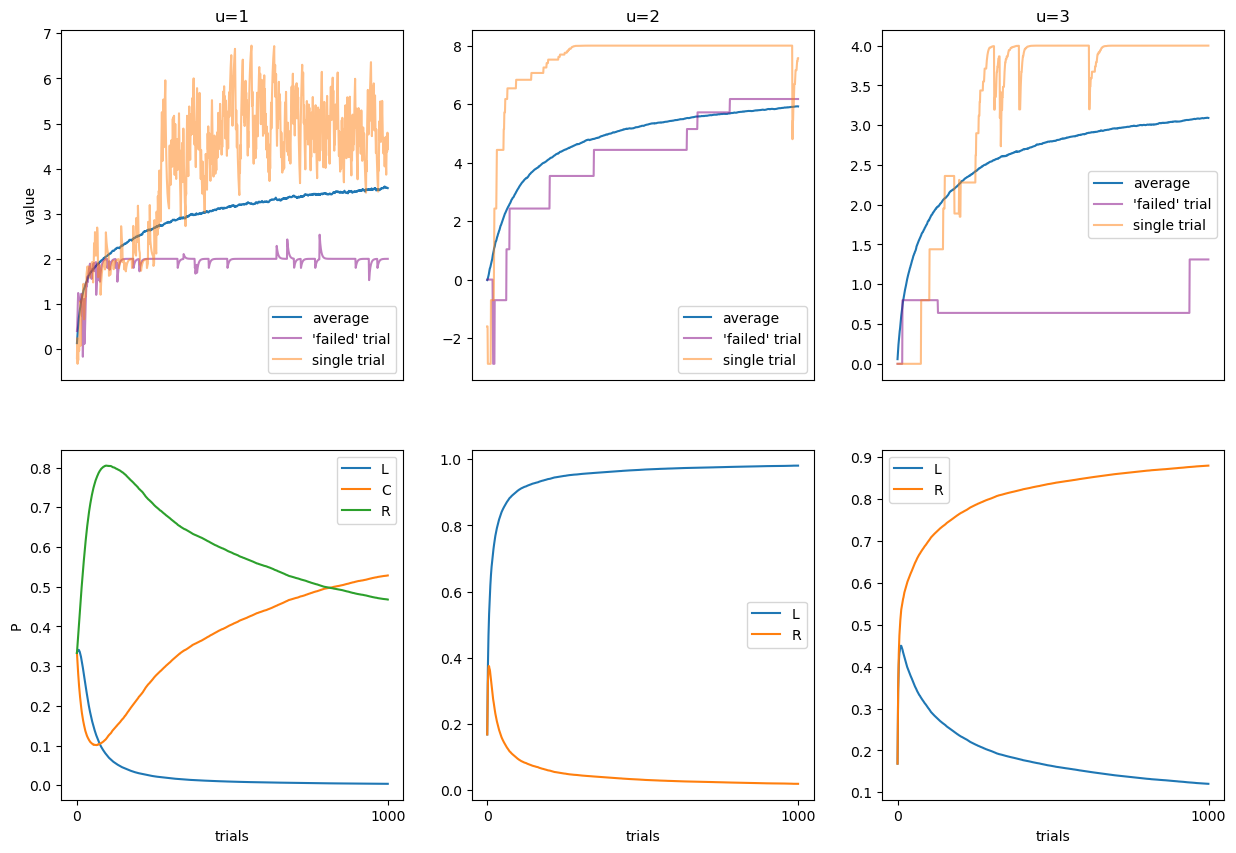

In [64]:
#9.9

fig, ax = plt.subplots(2,3,figsize=(15,10))
for cols in range(3):
    ax[0,cols].plot(val_all_avg[:,cols],label="average")
    ax[0,cols].plot(values_all_ac[4,:,cols],color="purple",alpha=0.5,label="'failed' trial")
    ax[0,cols].plot(values_all_ac[3,:,cols],alpha=0.5,label="single trial") #Single trial 
    ax[0,cols].legend()
    ax[0,0].set_ylabel("value")
    ax[0,cols].set_xticks([])
    ax[0,cols].set_title(f"u={cols + 1}")
    ax[1,cols].plot(p_all[cols])
    if cols==1 or cols==2:
        ax[1,cols].legend(["L","R"])
    ax[1,0].legend(["L","C","R"])
    ax[1,0].set_ylabel("P")
    ax[1,cols].set_xlabel("trials")
    ax[1,cols].set_xticks([0,1000])





In [59]:
runs = 1000

#Immediate choice values - not learnt state values:
c1_maze = 0
c2_maze = np.array([4,0])
c3_maze = np.array([2,3])

Initial_choice = np.array([1,2])

#For saving
values_all_maze = np.zeros([runs, n_trials, 3])
p1_all_maze = np.zeros([runs, n_trials, 2])
p2_all_maze = np.zeros([runs, n_trials, 2])
p3_all_maze = np.zeros([runs, n_trials, 2])

for r in tqdm.tqdm(range(runs)):
    m1_maze = np.zeros([n_trials,2]) #L,R 
    m2_maze = np.zeros([n_trials,2]) #L,R
    m3_maze = np.zeros([n_trials,2]) #L,R

    values_maze = np.zeros([n_trials, 3]) #0: Initial, 1: left, 2: right

    #Initialize/reset probabilites:
    p1_maze = np.zeros([n_trials,2])
    p2_maze = np.zeros([n_trials,2])
    p3_maze = np.zeros([n_trials,2])
    for i in range(len(p1_maze[0])):
        p1_maze[0,i] = np.exp(beta*m1[0,i])/np.sum(np.exp(m1[0]))
        p2_maze[0,i] = np.exp(beta*m2[0,i])/np.sum(np.exp(m2[0]))
        p3_maze[0,i] = np.exp(beta*m3[0,i])/np.sum(np.exp(m3[0]))

    for n in range(n_trials):
        for i in range(len(p1_maze[0])):
            p1_maze[n, i] = np.exp(beta * m1_maze[n-1, i]) / np.sum(np.exp(m1_maze[n-1])) # Update the action probabilities for the next trial
            p2_maze[n, i] = np.exp(beta * m2_maze[n-1, i]) / np.sum(np.exp(m2_maze[n-1]))
            p3_maze[n, i] = np.exp(beta * m3_maze[n-1, i]) / np.sum(np.exp(m3_maze[n-1]))
        a1 = np.random.choice(Initial_choice, p=p1_maze[n, :])
        if a1==1: #Go left
            a2 = np.random.choice(c2_maze, p=p2_maze[n,:])
            a2_idx = np.where(a2==c2_maze)[0][0]
            delta = c1_maze - values_maze[n-1,0] + values_maze[n-1,a1]
            delta2 = a2 - values_maze[n-1,a1]
            #Updating values
            values_maze[n] = values_maze[n-1]
            values_maze[n, 0] = values_maze[n-1, 0] + LR * delta
            values_maze[n, a1] = values_maze[n-1, a1] + LR* delta2
            m1_maze[n] = m1_maze[n-1]
            m1_maze[n, a1-1] = m1_maze[n - 1, a1-1] + LR_ac*delta
            m2_maze[n] = m2_maze[n-1]
            m2_maze[n,a2_idx] = m2_maze[n - 1, a2_idx] + LR_ac*delta2 #Error 
            m3_maze[n] = m3_maze[n-1]
        elif a1==2:
            a2 = np.random.choice(c3_maze, p=p3_maze[n,:])
            a2_idx = np.where(a2==c3_maze)[0][0]
            delta = c1_maze - values_maze[n-1,0] + values_maze[n-1,a1]
            delta2 = a2 - values_maze[n-1,a1]
            values_maze[n] = values_maze[n-1]
            values_maze[n, 0] = values_maze[n-1, 0] + LR * delta
            values_maze[n, a1] = values_maze[n-1, a1] + LR* delta2
            m1_maze[n] = m1_maze[n-1]
            m1_maze[n, a1-1] = m1_maze[n - 1, a1-1] + LR_ac*delta
            m3_maze[n] = m3_maze[n-1]
            m3_maze[n,a2_idx] = m3_maze[n - 1, a2_idx] + LR_ac*delta2
            m2_maze[n] = m2_maze[n-1]
    values_all_maze[r] = values_maze
    p1_all_maze[r] = p1_maze
    p2_all_maze[r] = p2_maze
    p3_all_maze[r] = p3_maze

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [07:42<00:00,  2.16it/s]


In [67]:
values_maze_avg = np.mean(values_all_maze,0)
p1_maze_avg = np.mean(p1_all_maze,0)
p2_maze_avg = np.mean(p2_all_maze,0)
p3_maze_avg = np.mean(p3_all_maze,0)
p_maze_all = [p1_maze_avg, p2_maze_avg, p3_maze_avg]

In [66]:
np.shape(values_maze_avg)

(1000, 3)

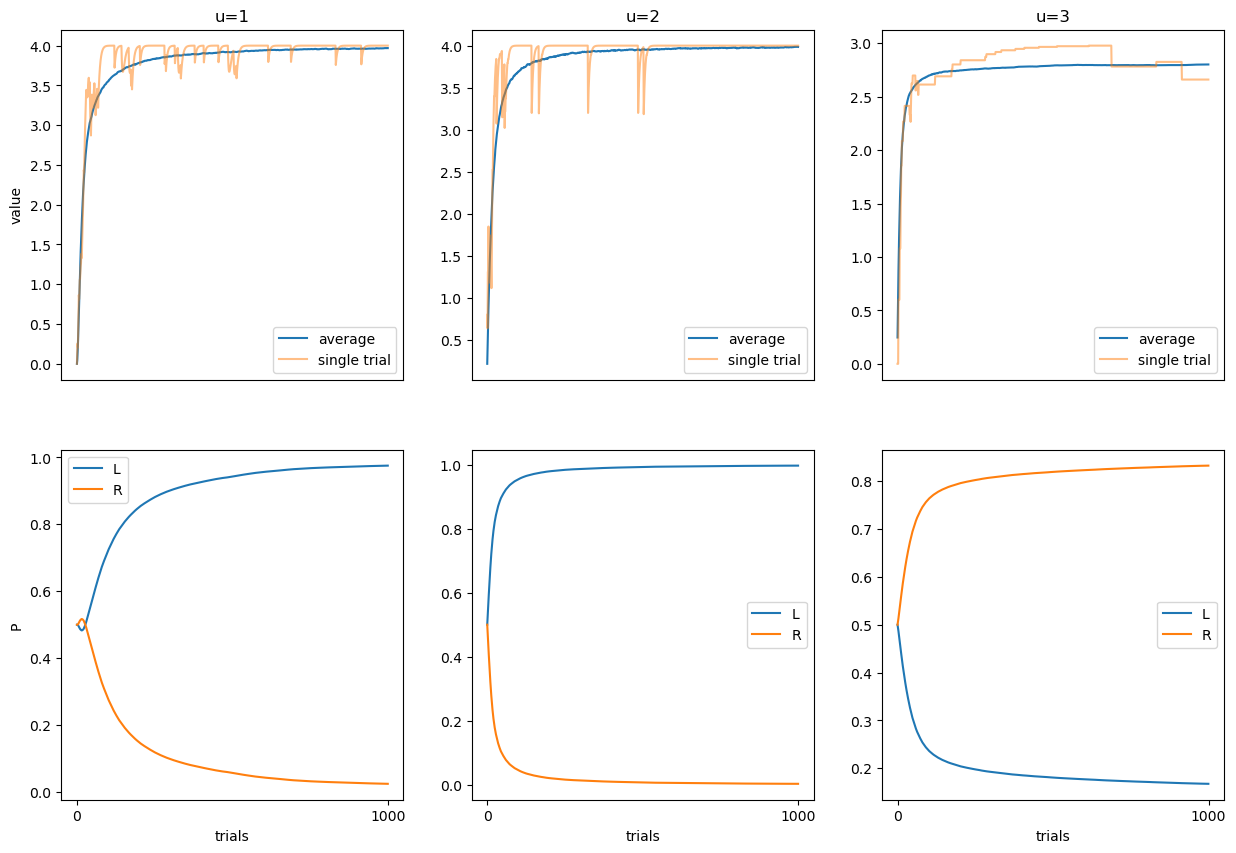

In [69]:
fig, ax = plt.subplots(2,3,figsize=(15,10))
for cols in range(3):
    ax[0,cols].plot(values_maze_avg[:,cols],label="average")
    ax[0,cols].plot(values_all_maze[3,:,cols],alpha=0.5,label="single trial") #Single trial 
    ax[0,cols].legend()
    ax[0,0].set_ylabel("value")
    ax[0,cols].set_xticks([])
    ax[0,cols].set_title(f"u={cols + 1}")
    ax[1,cols].plot(p_maze_all[cols],label=(["L","R"]))
    ax[1,0].set_ylabel("P")
    ax[1,cols].legend()
    ax[1,cols].set_xlabel("trials")
    ax[1,cols].set_xticks([0,1000])